In [1]:
from __future__ import print_function
from pathlib import Path
import sys, os

import nilmtk
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('../')

from src.utils import paths_manager as pathsman


In [2]:
rcParams['figure.figsize'] = (17, 6)

In [3]:
train_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
test_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)
val_dataset = nilmtk.DataSet(pathsman.UKDALE_H5_PATH)

In [4]:
BUILDING = 1

In [5]:
train_dataset.set_window("2014-06-01", "2014-06-15")
test_dataset.set_window("2014-06-01", "2014-06-06")
val_dataset.set_window("2014-07-01", "2014-07-06")

In [6]:
train_elec = train_dataset.buildings[BUILDING].elec
test_elec = test_dataset.buildings[BUILDING].elec
val_elec = val_dataset.buildings[BUILDING].elec

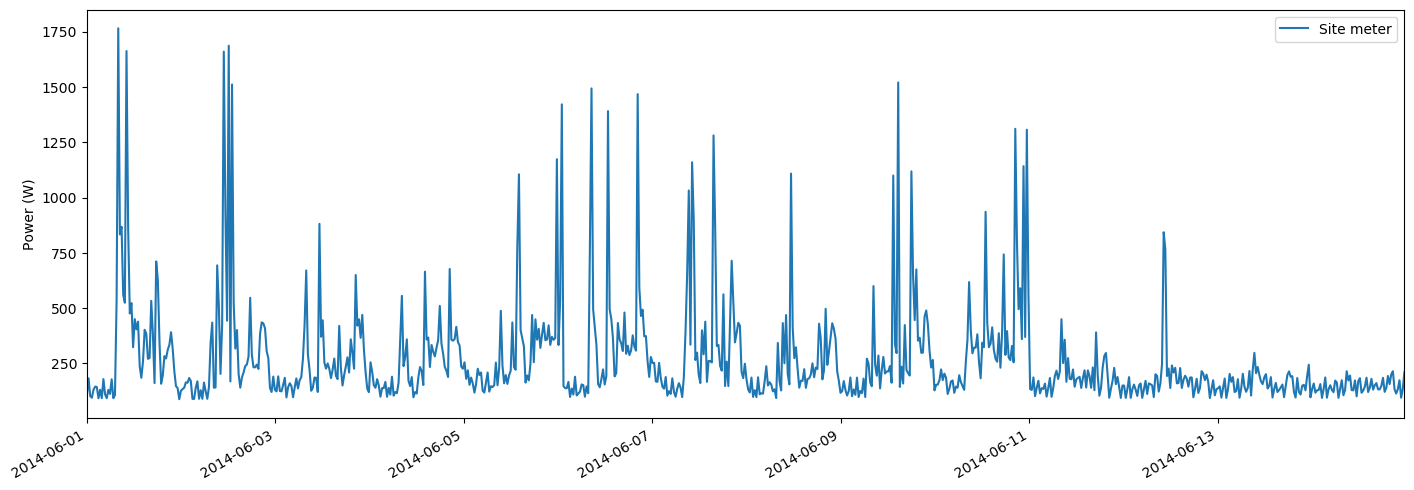

In [15]:
train_elec.mains().plot()

c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3

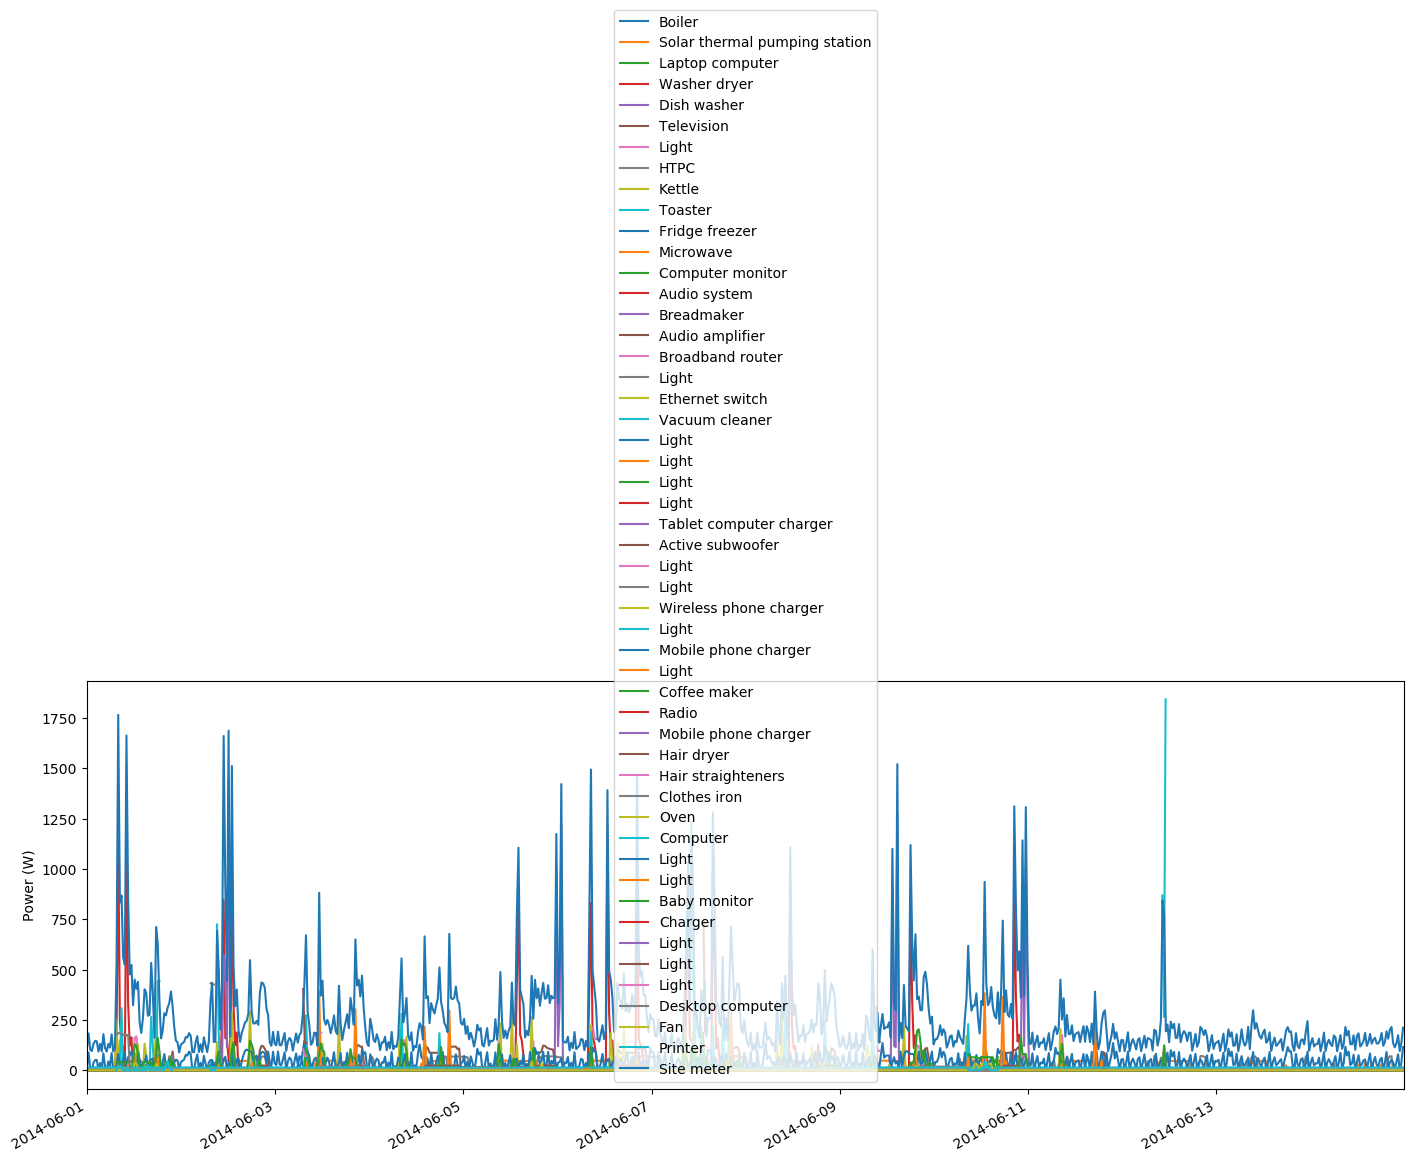

In [14]:
train_elec.plot()

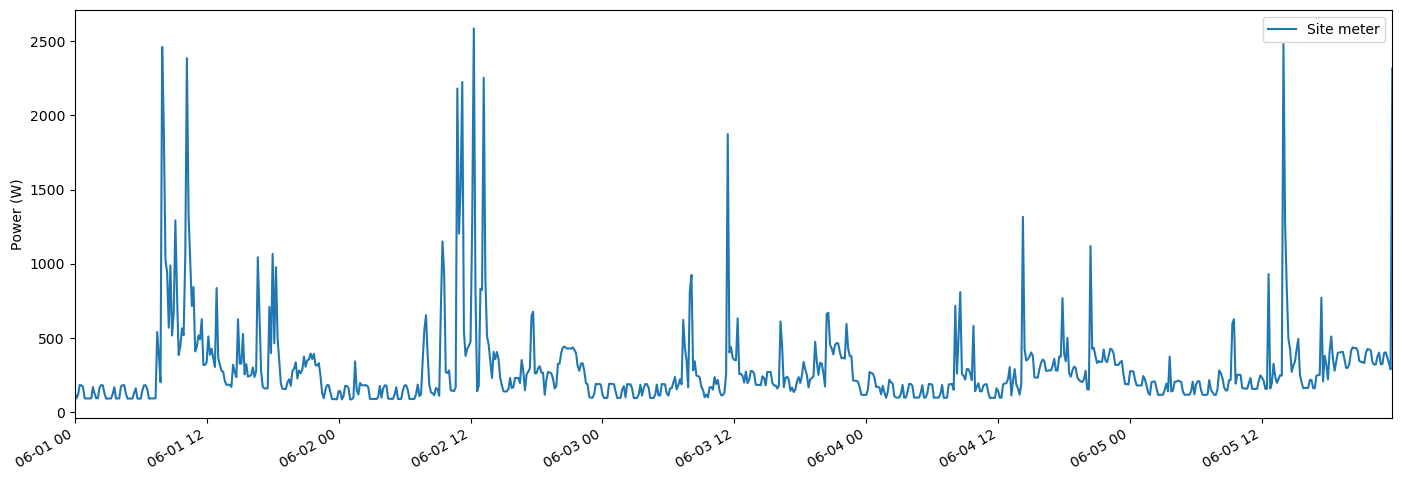

In [16]:
test_elec.mains().plot()

c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3\envs\nilmtk2-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
c:\Users\MTinaco\AppData\Local\anaconda3

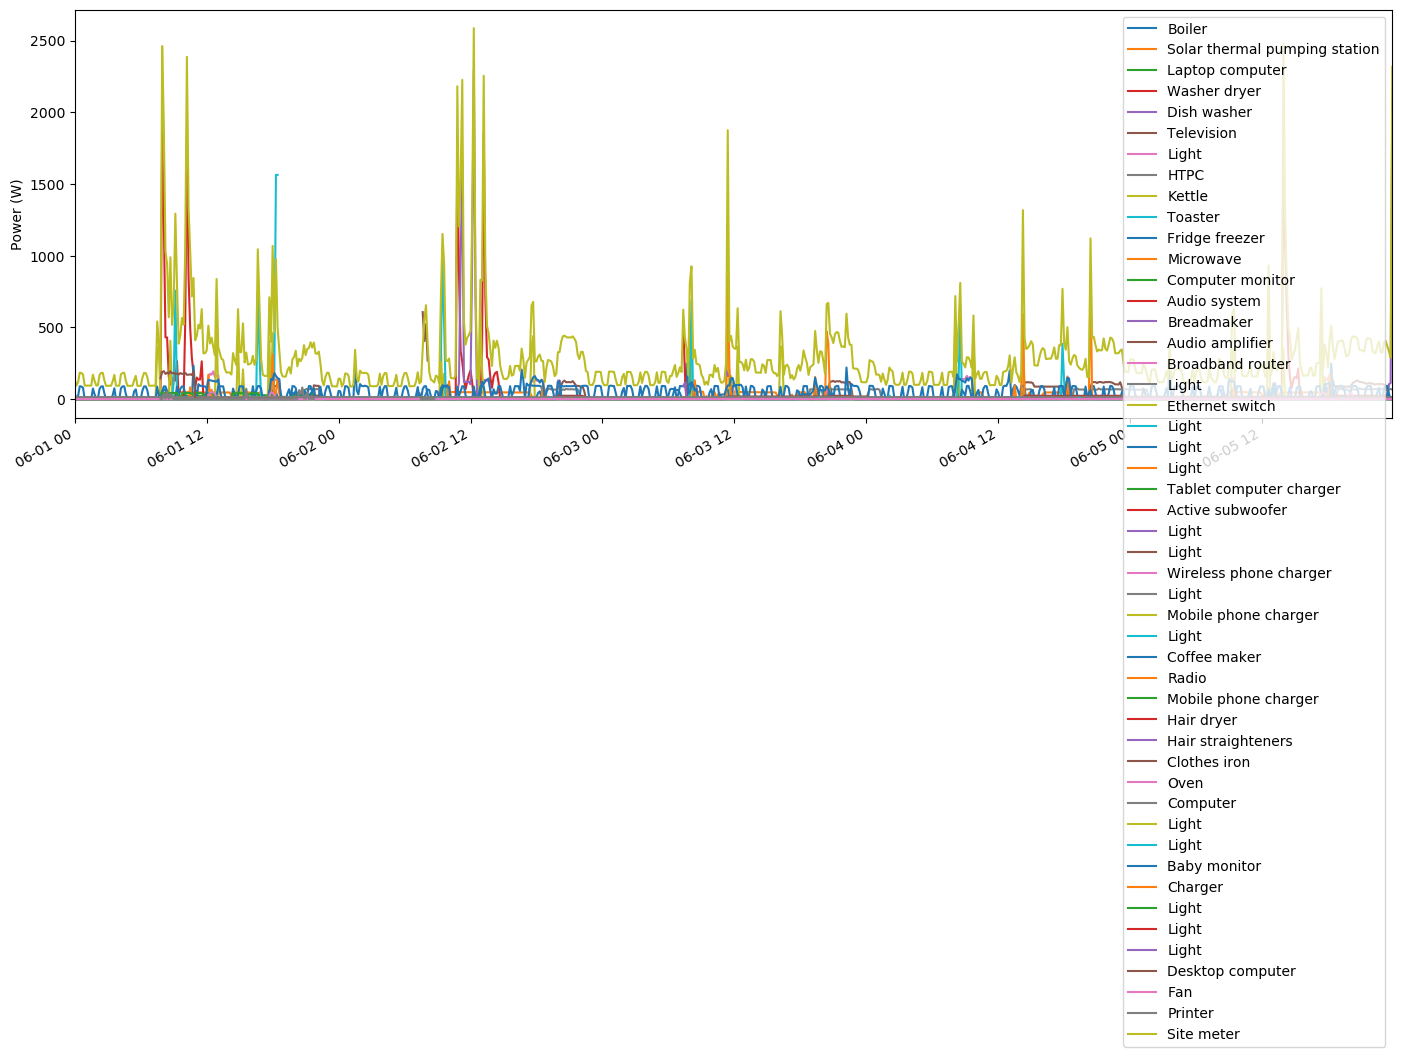

In [17]:
test_elec.plot()

In [19]:
fridge_meter = train_elec['fridge']

In [20]:
fridge_df = next(fridge_meter.load())

In [21]:
fridge_df.head()

physical_quantity,power
type,active
2014-06-01 00:00:06+01:00,84.0
2014-06-01 00:00:14+01:00,85.0
2014-06-01 00:00:22+01:00,86.0
2014-06-01 00:00:30+01:00,86.0
2014-06-01 00:00:36+01:00,85.0


In [22]:
mains = train_elec.mains()

In [23]:
mains_df = next(mains.load())

In [24]:
mains_df.head()

physical_quantity                      power                 voltage
type                                apparent      active            
2014-06-01 00:00:00.300000+01:00  213.240005  180.539993  240.199997
2014-06-01 00:00:01.300000+01:00  215.410004  182.000000  240.199997
2014-06-01 00:00:02.300000+01:00  214.369995  181.339996  240.259995
2014-06-01 00:00:03.300000+01:00  213.899994  181.220001  240.199997
2014-06-01 00:00:04.300000+01:00  214.529999  181.589996  240.059998

## Selecting top-5 appliances

In [25]:
top_5_train_elec = train_elec.submeters().select_top_k(k=5)

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

In [26]:
top_5_train_elec

MeterGroup(meters=
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances=[Appliance(type='HTPC', instance=1)])
)

In [31]:
top_5_test_elec = test_elec.submeters().select_top_k(k=5)

52/52 ElecMeter(instance=53, building=1, dataset='UK-DALE', appliances=[Appliance(type='printer', instance=1)])ance=1)])e(type='external hard disk', instance=1)])e=2), Appliance(type='radio', instance=3)])1)])

In [32]:
top_5_test_elec

MeterGroup(meters=
  ElecMeter(instance=12, building=1, dataset='UK-DALE', appliances=[Appliance(type='fridge freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=10, building=1, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='food processor', instance=1), Appliance(type='toasted sandwich maker', instance=1)])
  ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])
)